# Introduction to Plotting in Python

This workshop will cover basic and interactive plotting in Python using matplotlib and plotly. We will also look at how to load and handle data.

### Installation:
Please ensure you have the following libraries installed to follow along:
```bash
pip install numpy pandas matplotlib plotly ipykernel scipy
```


# Data Loading

We will start by loading data from CSV and JSON files using pandas. This will help us in plotting various types of data.

### Considerations:

- Be mindful of large files as they can consume a significant amount of memory.
- Always check for and handle missing or corrupt data to prevent errors in plotting.

To change the content to italic in Markdown, you can use the asterisk (*) or underscore (_) symbols around the text. Here's the modified markdown content:

<br>

*Loading Data from CSV*
```python
import pandas as pd
data_csv = pd.read_csv('path_to_your_data.csv')
print(data_csv.head())

```
<br>
Loading Data from JSON*

```python
data_json = pd.read_json('path_to_your_data.json')
print(data_json.head())
```


# Why Do We Need Plotting?
Plotting is essential in data analysis for several reasons.

<br>

__1- Visualization__<br>Plots transform abstract numbers and datasets into visual stories that are easier to understand and interpret. They make patterns, trends, and outliers apparent that might not be noticeable in raw data.

__2 - Analysis__<br>By visualizing data, we can quickly identify correlations, monitor changes over time, and spot distribution and variability among variables. This aids in hypothesis testing and decision-making.

__3 - Communication__<br>Plots and charts are powerful tools for sharing results and insights. They help in communicating complex data in a clear and effective manner to a broad audience.

__4 - Efficiency__<br>Graphical representations allow analysts to digest large amounts of data quickly compared to tabular data analysis.

# Basic Plotting with matplotlib

Let us create some basic plots to understand the plotting capabilities of matplotlib.

__Line plot__

In [1]:
import pandas as pd
data_csv = pd.read_csv('galaxy_data.csv')
# read json file as disctionary
import json
with open('galaxy_data.json') as f:
    data_json = json.load(f)
# change galaxy_type to category type
data_csv['galaxy_type'] = data_csv['galaxy_type'].astype('category')

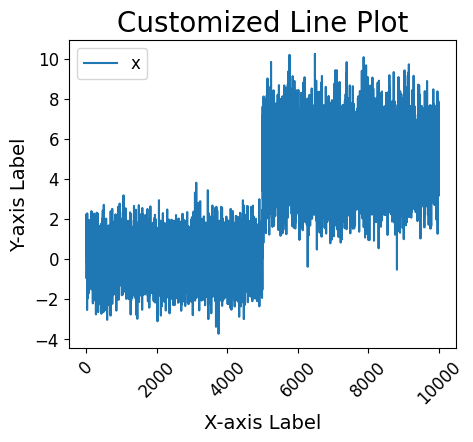

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.plot(data_csv['x'], label='x')
plt.title('Customized Line Plot', fontsize=20)
plt.xlabel('X-axis Label', fontsize=14)
plt.ylabel('Y-axis Label', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

__Scatter Plot__

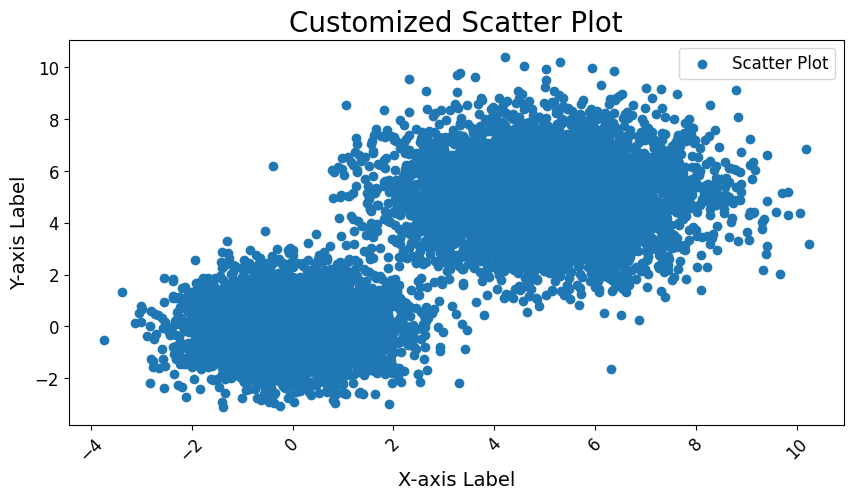

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(data_csv['x'], data_csv['y'], label='Scatter Plot')
plt.title('Customized Scatter Plot', fontsize=20)
plt.xlabel('X-axis Label', fontsize=14)
plt.ylabel('Y-axis Label', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Assume custom_x_labels is predefined
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


__Histogram__

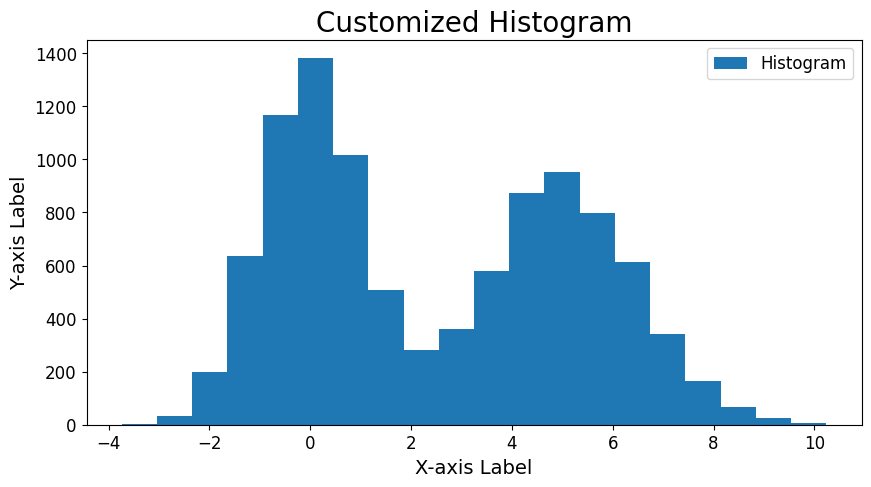

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(data_csv['x'], bins=20, label='Histogram')
plt.title('Customized Histogram', fontsize=20)
plt.xlabel('X-axis Label', fontsize=14)
plt.ylabel('Y-axis Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


# Interactive Plotting with plotly
Another option is to use Plotly, which provides interactive plots that can be embedded in web applications or shared online.  

__Line plot__

In [5]:
import plotly.express as px
import plotly.io as pio

fig = px.line({"x": [0,1], "y": [0,1]}, x='x', y='y', title='Customized Interactive Line Plot')
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12,
    font=dict(family="Courier New, monospace", size=12),
    xaxis_tickangle=-45
)

# fig.show()
pio.write_html(fig, file='line_plot.html', auto_open=True)


__Scatter Plot__

In [6]:
size_data = (data_csv["log10_mass"] - data_csv["log10_mass"].min())/(data_csv["log10_mass"].max() - data_csv["log10_mass"].min())
size_data = (size_data * 3)**2
fig = px.scatter(data_csv, x='x', y='y', color='color', title='Customized Interactive Scatter Plot')
fig.update_traces(marker=dict(size=12))
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12,
    font=dict(family="Courier New, monospace", size=12),
    xaxis_tickangle=-45
)
pio.write_html(fig, file='line_plot.html', auto_open=True)


__Histogram__

In [7]:
fig = px.histogram(data_csv, x='x', nbins=20, title='Customized Interactive Histogram')
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12,
    font=dict(family="Courier New, monospace", size=12),
    xaxis_tickangle=-45
)
pio.write_html(fig, file='histogram_plot.html', auto_open=True)


# 2D Histogram and Contour Plotting
Let's create a 2D histogram with contours for 1-sigma and 2-sigma to visualize data distribution and correlation in two dimensions.

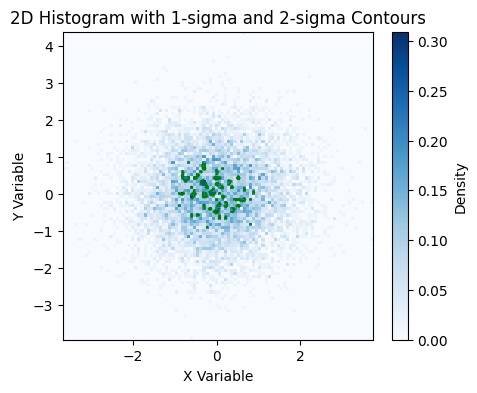

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data generation (replace with actual data)
x = np.random.normal(size=10000)
y = np.random.normal(size=10000)

# 2D Histogram
plt.figure(figsize=(5, 4))
hist, xedges, yedges, image = plt.hist2d(x, y, bins=100, density=True, cmap='Blues')

# Calculate the data for the contour lines
X, Y = np.meshgrid(xedges[:-1] + 0.5 * np.diff(xedges), yedges[:-1] + 0.5 * np.diff(yedges))
Z = hist.T

# Plot contours for 1-sigma and 2-sigma
sigma1 = norm.ppf(0.6827)  # Approximate value for 1-sigma
sigma2 = norm.ppf(0.9545)  # Approximate value for 2-sigma
contour1 = plt.contour(X, Y, Z, levels=[Z.max()/sigma1], colors='red', linestyles='dashed')
contour2 = plt.contour(X, Y, Z, levels=[Z.max()/sigma2], colors='green', linestyles='dashed')
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('2D Histogram with 1-sigma and 2-sigma Contours')
plt.colorbar(image, label='Density')
plt.clabel(contour1, inline=True, fontsize=10, fmt='1-sigma')
plt.clabel(contour2, inline=True, fontsize=10, fmt='2-sigma')

plt.show()


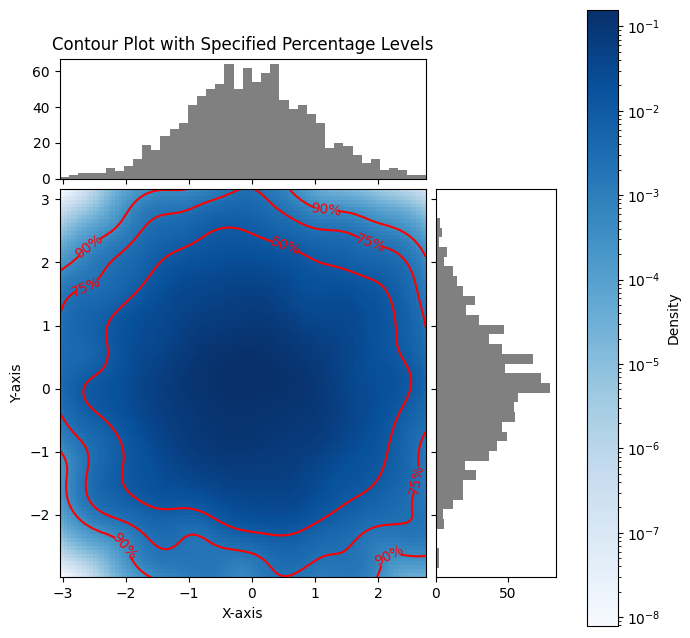

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Generate sample data (replace with your actual data)
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)

# Perform a Gaussian kernel density estimate
kde = gaussian_kde([x, y])
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Calculate the contour levels for the desired percentage
percentages = [0.9, 0.75, 0.5]  # 50%, 75%, 90%
#option 1
# levels = [np.percentile(Z, 100 * (1 - p)) for p in percentages]
# option 2
start_coord = np.array([0, 0])

# Calculate the Euclidean distance from the starting coordinate to all other points
distances = np.sqrt((X - start_coord[0])**2 + (Y - start_coord[1])**2)

# Flatten the distances and Z arrays
distances_flat = distances.flatten()
Z_flat = Z.flatten()

# Sort the Z values based on the distances
Z_sorted = [z for _, z in sorted(zip(distances_flat, Z_flat))]

# Calculate the levels based on the sorted Z values
levels = [np.percentile(Z_sorted, 100 * (1 - p)) for p in percentages]

# Plotting the contour lines
## option 1
# fig, ax = plt.subplots()
# image = ax.imshow(np.rot90(Z), cmap='Blues', extent=[xmin, xmax, ymin, ymax], norm=mcolors.LogNorm(vmin=Z.min(), vmax=Z.max()))
# contour = ax.contour(X, Y, Z, levels=levels, colors='red')
# ax.clabel(contour, fmt={l: f'{p*100:.0f}%' for l, p in zip(contour.levels, percentages)}, fontsize=10)
# plt.colorbar(image, label='Density')
# plt.title('Contour Plot with Specified Percentage Levels')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.show()

# Create a grid of subplots
# option 2
fig, main_ax = plt.subplots(figsize=(8, 8))

# Main plot with contour lines
image = main_ax.imshow(np.rot90(Z), cmap='Blues', extent=[xmin, xmax, ymin, ymax], norm=mcolors.LogNorm(vmin=Z.min(), vmax=Z.max()))
contour = main_ax.contour(X, Y, Z, levels=levels, colors='red')
main_ax.clabel(contour, fmt={l: f'{p*100:.0f}%' for l, p in zip(contour.levels, percentages)}, fontsize=10)
plt.colorbar(image, label='Density', ax=main_ax)
main_ax.set_xlabel('X-axis')
main_ax.set_ylabel('Y-axis')

# Create divider for the existing axes instance
divider = make_axes_locatable(main_ax)
x_hist = divider.append_axes("top", 1.2, pad=0.1, sharex=main_ax)
y_hist = divider.append_axes("right", 1.2, pad=0.1, sharey=main_ax)

# Make some labels invisible
x_hist.xaxis.set_tick_params(labelbottom=False)
y_hist.yaxis.set_tick_params(labelleft=False)

# Histogram on the top
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
# x_hist.invert_yaxis()

# Histogram on the right
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
# y_hist.invert_xaxis()

# add title to the figure
# plt.suptitle('Contour Plot with Specified Percentage Levels', fontsize=16)
x_hist.set_title('Contour Plot with Specified Percentage Levels')
plt.show()


# Understanding Figures and Axes in matplotlib
Let's understand the concept of figures and axes in matplotlib and why they are important for creating complex and customizable plots.

## Explanation

__Figure__<br> The top-level container for all plot elements. Think of it as the canvas or window in which your plot is drawn. You can have multiple independent figures.

__Axes__<br> The part of the figure where data is plotted, including points, lines, and labels. It includes the x-axis, y-axis, and possibly secondary axes. A figure can contain one or more axes.

## Why is it important?

__Control and Flexibility__<br> Using fig and ax gives you full control over your plot layout. You can precisely place, size, and add individual plots within a figure.

__Complex Layouts__<br> Easily create complex layouts (like subplots) that are properly aligned and sized.

__Fine-tuning__<br> Offers detailed control over plot elements, layout, and other visual aspects.



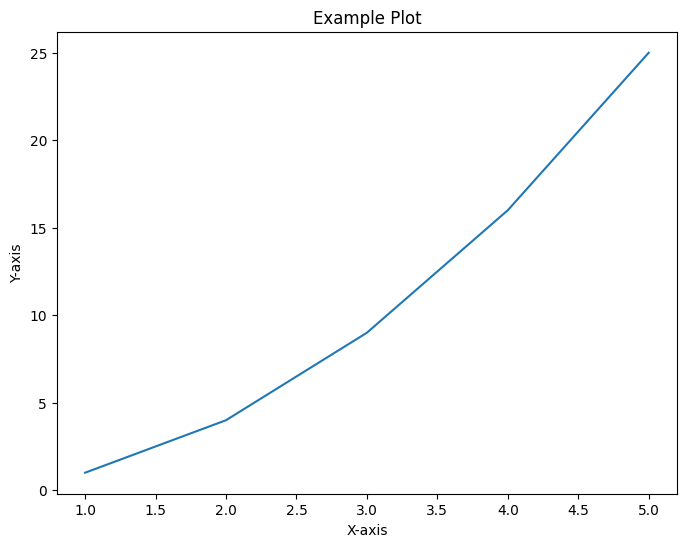

In [10]:
import matplotlib.pyplot as plt

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting on the Axes object
ax.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
ax.set_title('Example Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()


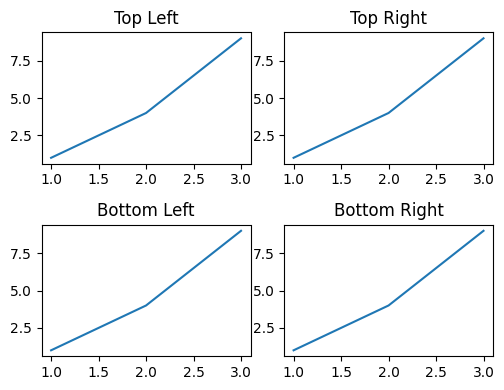

In [11]:
import matplotlib.pyplot as plt

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(5, 4))

# Plotting data on each subplot
axs[0, 0].plot([1, 2, 3], [1, 4, 9])
axs[0, 0].set_title('Top Left')

axs[0, 1].plot([1, 2, 3], [1, 4, 9])
axs[0, 1].set_title('Top Right')

axs[1, 0].plot([1, 2, 3], [1, 4, 9])
axs[1, 0].set_title('Bottom Left')

axs[1, 1].plot([1, 2, 3], [1, 4, 9])
axs[1, 1].set_title('Bottom Right')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


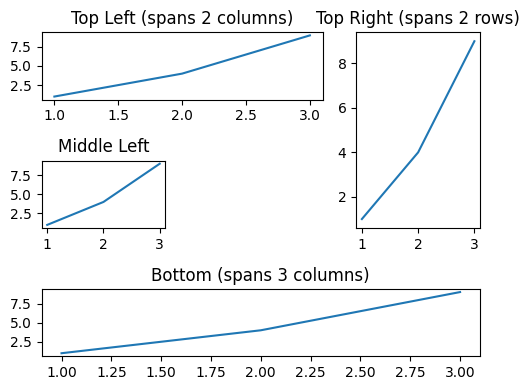

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(5, 4))

# Create a GridSpec with 3 rows and 3 columns
gs = gridspec.GridSpec(3, 3, figure=fig)

# Add subplots with different sizes
ax1 = fig.add_subplot(gs[0, 0:2])  # First subplot spanning two columns
ax1.plot([1, 2, 3], [1, 4, 9])
ax1.set_title('Top Left (spans 2 columns)')

ax2 = fig.add_subplot(gs[0:2, 2])  # Second subplot spanning two rows
ax2.plot([1, 2, 3], [1, 4, 9])
ax2.set_title('Top Right (spans 2 rows)')

ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax3.plot([1, 2, 3], [1, 4, 9])
ax3.set_title('Middle Left')

ax4 = fig.add_subplot(gs[2, 0:3])  # Fourth subplot spanning all columns
ax4.plot([1, 2, 3], [1, 4, 9])
ax4.set_title('Bottom (spans 3 columns)')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()
